# Walkthrough

In [1]:
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

In [2]:
from classes import preprocess, eda, LDA, KMeansClustering, sentiment_analysis, models

c:\users\mdfl0\appdata\local\programs\python\python39\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mdfl0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data preparation (with\out duplicates)


In [3]:
preprocess_non_duplicates = preprocess(df='bam_aquino_v2.csv',added_stopwords='filipino_stopwords.csv', 
                                       sent_column=['Comment type (Text-based)','Comment Validation (Context-based)'], 
                                       comment_column='Comment', dups=1, drop=['Video Link', 'Comment Image Rate'])

drop
shape of dataframe:  (2707, 8)


In [4]:
preprocess_duplicates = preprocess(df='bam_aquino_v2.csv',added_stopwords='filipino_stopwords.csv', 
                                   sent_column=['Comment type (Text-based)','Comment Validation (Context-based)'],
                                   comment_column='Comment',dups=0, drop=['Video Link', 'Comment Image Rate'])

shape of dataframe:  (5307, 8)


In [5]:
preprocess_non_duplicates.df['Comment Validation (Context-based)'].value_counts()

2.0    1566
0.0     874
1.0     267
Name: Comment Validation (Context-based), dtype: int64

In [6]:
preprocess_non_duplicates.df['Comment type (Text-based)'].value_counts()

1.0    1258
0.0    1073
2.0     376
Name: Comment type (Text-based), dtype: int64

In [7]:
preprocess_duplicates.df['Comment Validation (Context-based)'].value_counts()

2.0    3394
0.0    1483
1.0     430
Name: Comment Validation (Context-based), dtype: int64

In [8]:
preprocess_duplicates.df['Comment type (Text-based)'].value_counts()

1.0    3114
0.0    1554
2.0     639
Name: Comment type (Text-based), dtype: int64

In [9]:
preprocess_non_duplicates.df.head()

Comment  \
0  SANDALI PAGOUT KO MAGREACT AKO SA "READY FOR L...   
1  "Madaling hulaan presidente binoto mo. Pramis!...   
2  kuya reaction video Naman sa ready for love ng bp   
3               REACTION TO BLACKPINI READY FOR LOVE   
4     beb beyonce fan ka ba? renaissance is outtt!!!   

   Comment type (Text-based)       Account  \
0                        1.0  _renceseason   
1                        1.0  _renceseason   
2                        1.0  _renceseason   
3                        1.0  _renceseason   
4                        1.0  _renceseason   

   Comment Validation (Context-based)               Notes Unnamed: 7  \
0                                 1.0  not related to Bam        NaN   
1                                 1.0  not related to Bam        NaN   
2                                 1.0  not related to Bam        NaN   
3                                 1.0  not related to Bam        NaN   
4                                 1.0  not related to Bam        NaN   

                                            features  \
0           [sandali, pagout, magreact, ready, love]   
1  [madaling, hulaan, presidente, binoto, pramis,...   
2               [kuya, reaction, video, ready, love]   
3                 [reaction, blackpini, ready, love]   
4              [beb, beyonce, fan, renaissance, !!!]   

                              features_string_format  
0                 sandali pagout magreact ready love  
1  madaling hulaan presidente binoto pramis hahah...  
2                     kuya reaction video ready love  
3                      reaction blackpini ready love  
4                    beb beyonce fan renaissance !!!

In [10]:
df1 = preprocess_non_duplicates.df[preprocess_non_duplicates.df['Notes'] == 'related to Bam']

In [11]:
df2 = preprocess_non_duplicates.df[preprocess_non_duplicates.df['Notes'] == 'not related to Bam']

In [12]:
df1.to_csv('related.csv')

In [13]:
df2.to_csv('not_related.csv')

# Non Duplicate values (context base)

## Phase 1: comments related to Bam

### A. Facts and analysis

In [14]:
df1 = preprocess_non_duplicates.df[preprocess_non_duplicates.df['Notes'] == 'related to Bam']

In [15]:
df1['Comment Validation (Context-based)'].value_counts()

0.0    570
2.0    320
1.0     55
Name: Comment Validation (Context-based), dtype: int64

In [16]:
eda_non_duplicates = eda(df1, text_column_name='features_string_format', sent_column_name='Comment Validation (Context-based)')

In [17]:
# total number of comments
eda_non_duplicates.df['features_string_format'].notnull().sum().sum()

945

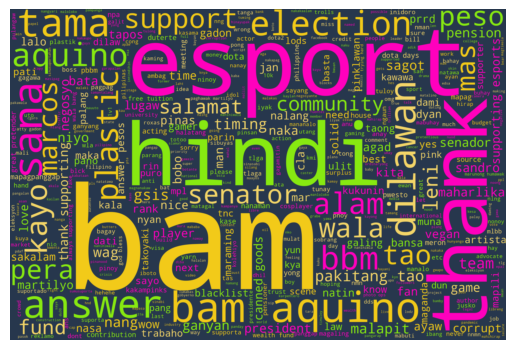

In [18]:
eda_non_duplicates.generate_wordcloud(filename='all_comment_context_base_bam_related')

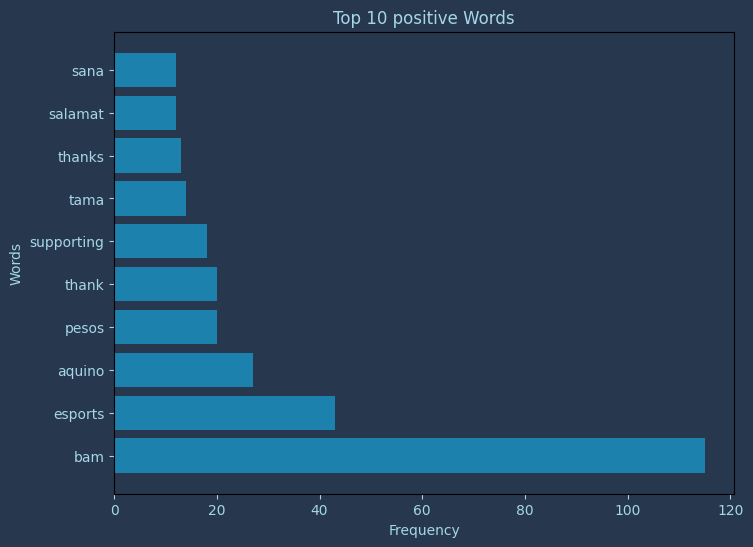

In [19]:
# top 5 positive comments
x = df1[df1['Comment Validation (Context-based)'] == 2.0]
positive = eda(x, text_column_name='features_string_format', sent_column_name='Comment Validation (Context-based)')
positive.top_words(10, 'positive', 'positive_context_base_bam_related')

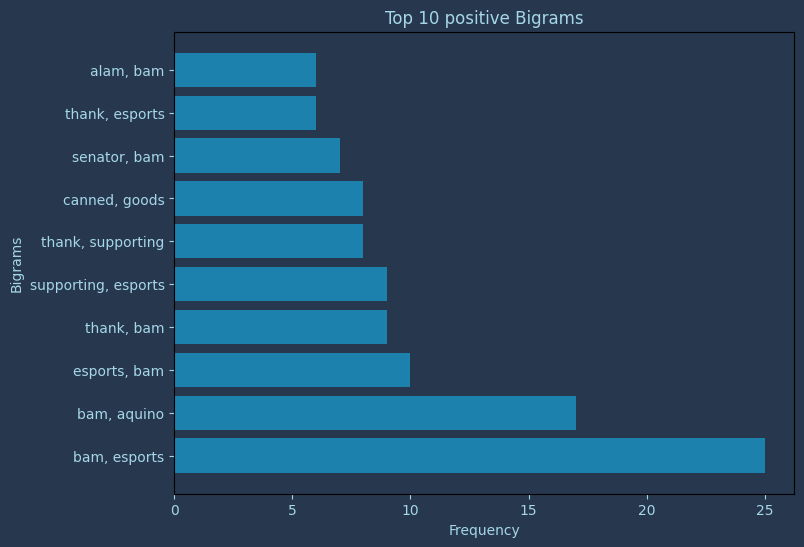

In [20]:
# top 5 positive bigrams
positive.bigrams(10, 'positive', 'positive_context_base_bam_related')

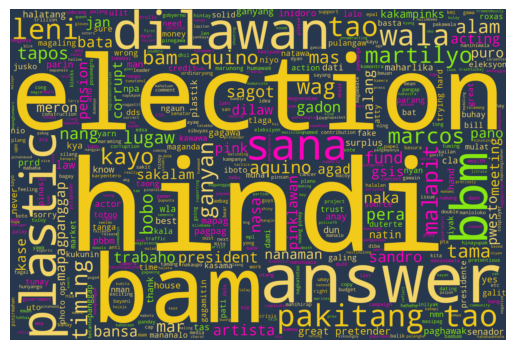

In [21]:
eda_non_duplicates.generate_wordcloud('negative_context_base_bam_related', 'Comment Validation (Context-based)', 0.0)

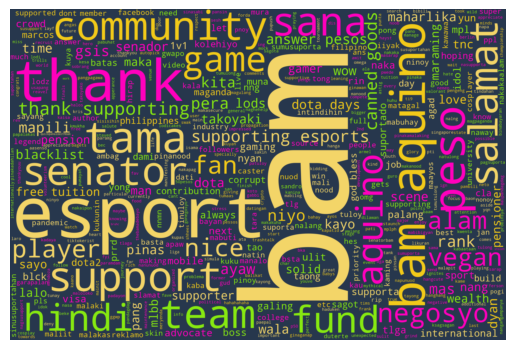

In [22]:
eda_non_duplicates.generate_wordcloud('positive_context_base_bam_related', 'Comment Validation (Context-based)', 2.0)

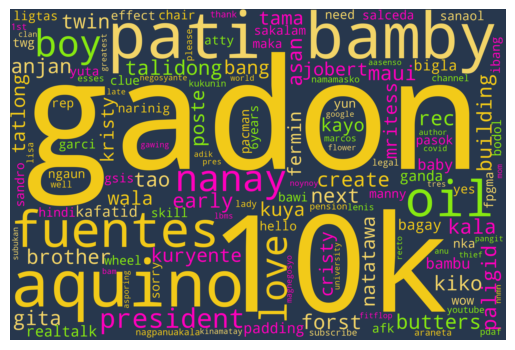

In [23]:
eda_non_duplicates.generate_wordcloud('neutral_context_base_bam_related', 'Comment Validation (Context-based)', 1.0)

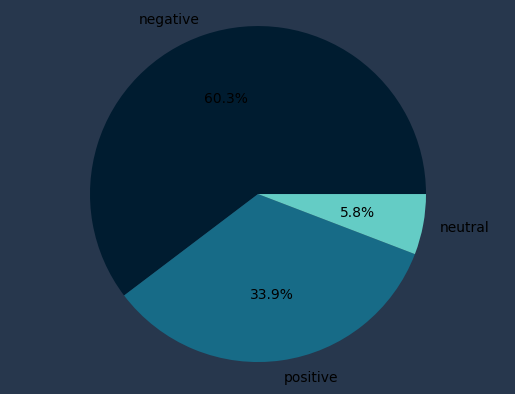

In [24]:
eda_non_duplicates.pie_sentiment('context_base_bam_related', 'Comment Validation (Context-based)')

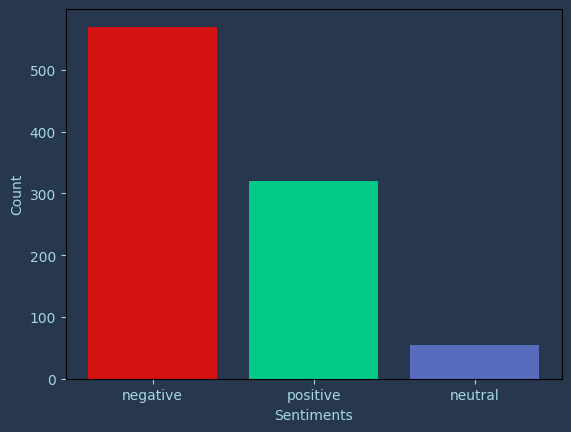

In [25]:
eda_non_duplicates.bar_sentiment('context_base_bam_related', 'Comment Validation (Context-based)')

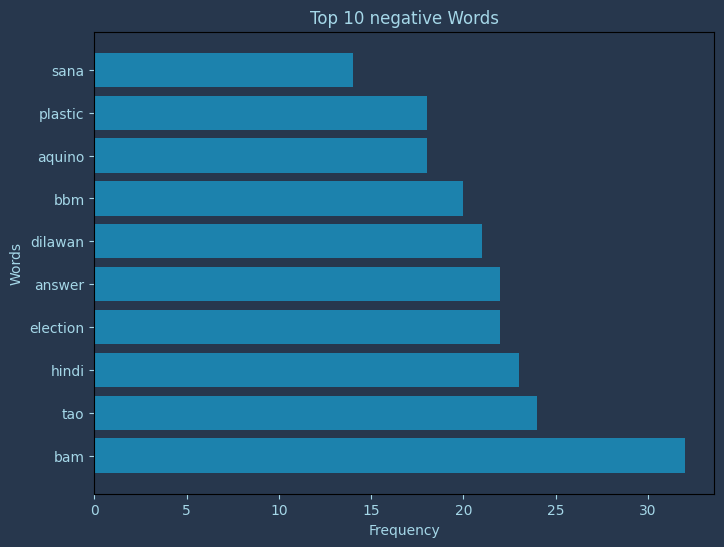

In [26]:
# top 5 negative comments
x = df1[df1['Comment Validation (Context-based)'] == 0.0]
negative = eda(x, text_column_name='features_string_format', sent_column_name='Comment Validation (Context-based)')
negative.top_words(10, 'negative', 'negative_context_base_bam_related')

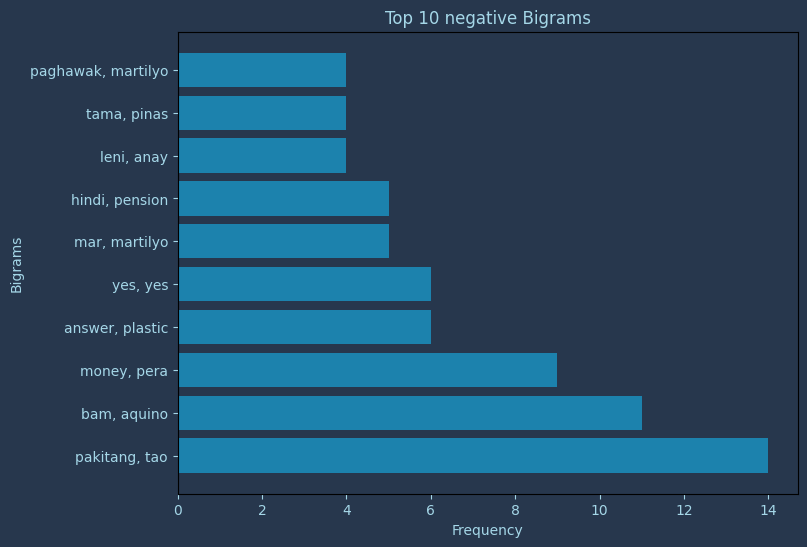

In [27]:
# top 5 negative bigrams 
negative.bigrams(10, 'negative', 'negative_context_base_bam_related')

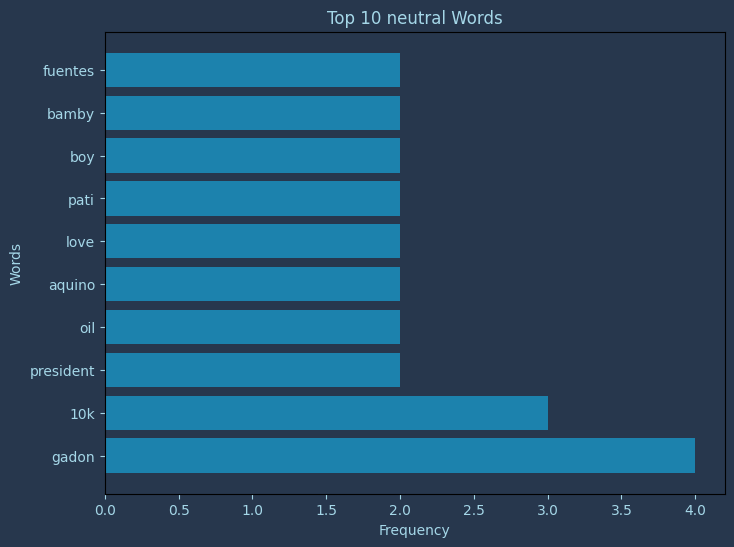

In [28]:
# top 5 neutral comments
z = df1[df1['Comment Validation (Context-based)'] == 1.0]
neutral = eda(z, text_column_name='features_string_format', sent_column_name='Comment Validation (Context-based)')
neutral.top_words(10, 'neutral', 'neutral_context_base_bam_related')

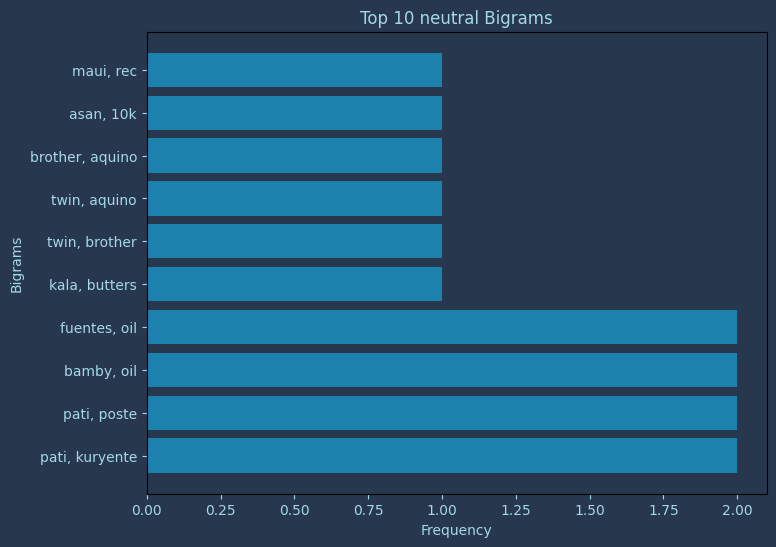

In [29]:
# top 5 negative comments _context_base_bam_related
neutral.bigrams(10, 'neutral', 'neutral_context_base_bam_related')

## Phase 2: comments not related to Bam

### A. Facts and analysis

In [30]:
df2 = preprocess_non_duplicates.df[preprocess_non_duplicates.df['Notes'] == 'not related to Bam']

In [31]:
df2['Comment Validation (Context-based)'].value_counts()

2.0    1244
0.0     302
1.0     212
Name: Comment Validation (Context-based), dtype: int64

In [32]:
eda_non_duplicates_not_related = eda(df2, text_column_name='features_string_format', sent_column_name='Comment Validation (Context-based)')

In [33]:
# total number of comments
eda_non_duplicates_not_related.df['features_string_format'].notnull().sum().sum()

1758

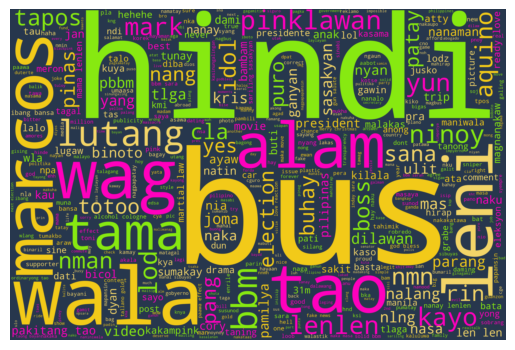

In [34]:
eda_non_duplicates_not_related.generate_wordcloud(filename='context_base_not_bam_related')

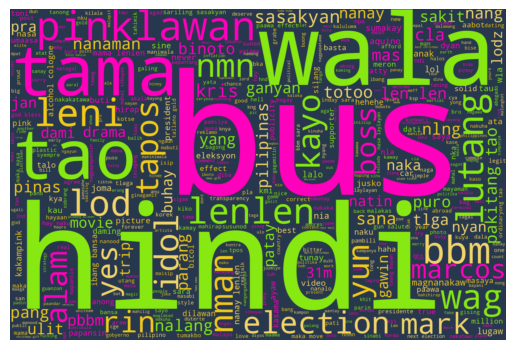

In [35]:
eda_non_duplicates_not_related.generate_wordcloud('positive_context_base_not_bam_related', 'Comment Validation (Context-based)', 2.0)

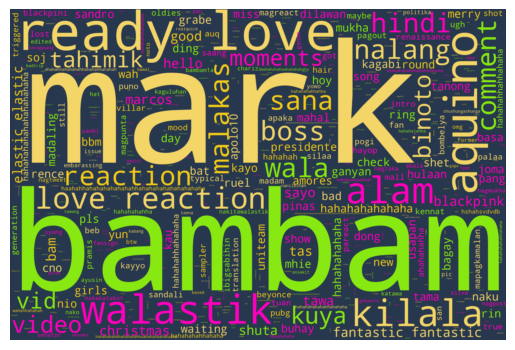

In [36]:
eda_non_duplicates_not_related.generate_wordcloud('neutral_context_base_not_bam_related', 'Comment Validation (Context-based)', 1.0)

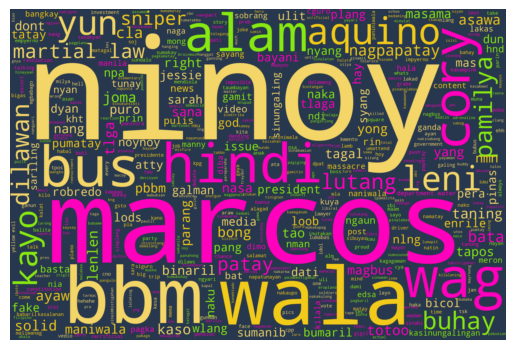

In [37]:
eda_non_duplicates_not_related.generate_wordcloud('negative_context_base_not_bam_related', 'Comment Validation (Context-based)', 0.0)

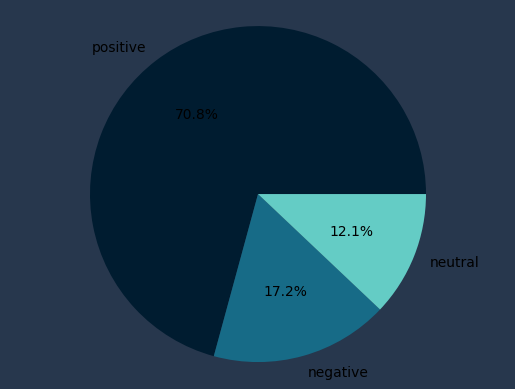

In [38]:
eda_non_duplicates_not_related.pie_sentiment('context_base_not_bam_related', 'Comment Validation (Context-based)')

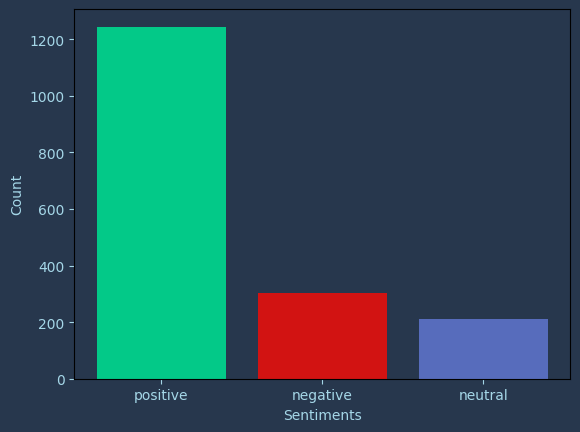

In [39]:
eda_non_duplicates_not_related.bar_sentiment('context_base_not_bam_related', 'Comment Validation (Context-based)')

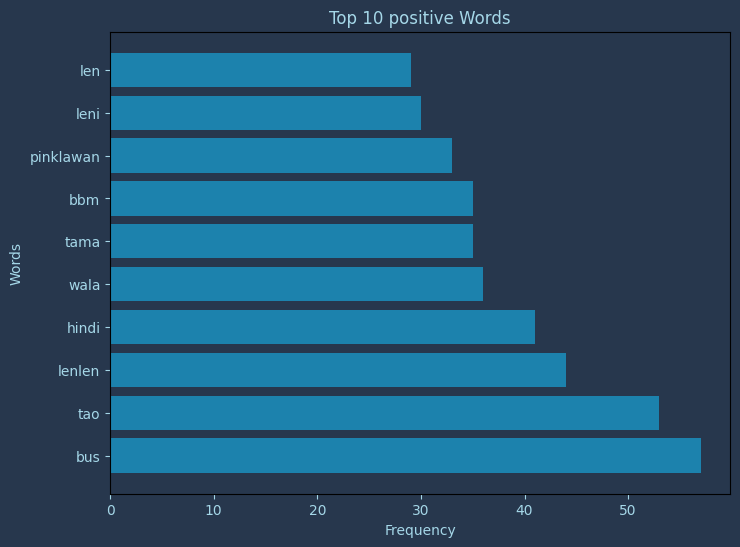

In [40]:
# top 5 positive comments
x = df2[df2['Comment Validation (Context-based)'] == 2.0]
positive = eda(x, text_column_name='features_string_format', sent_column_name='Comment Validation (Context-based)')
positive.top_words(10, 'positive', 'positive_context_base_not_bam_related')

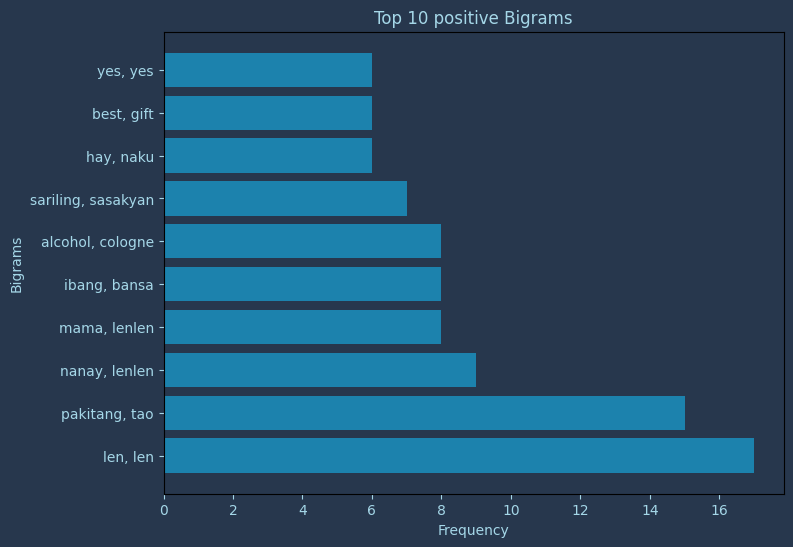

In [41]:
positive.bigrams(10, 'positive', 'positive_context_base_not_bam_related')

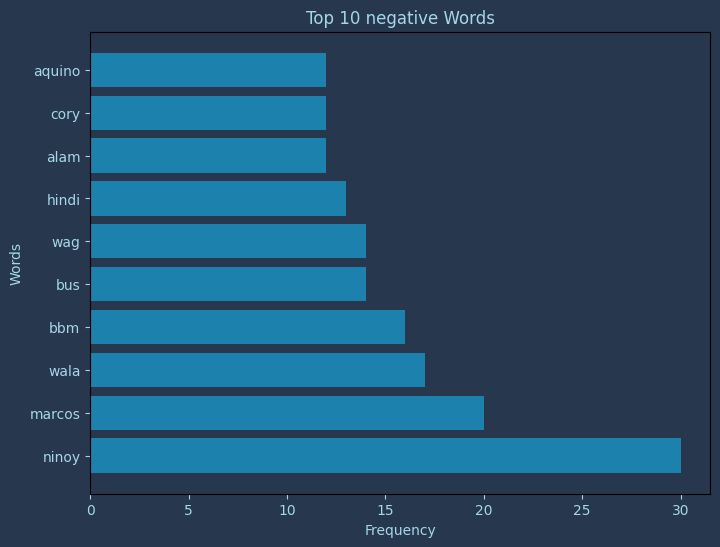

In [42]:
# top 5 negative comments
x = df2[df2['Comment Validation (Context-based)'] == 0.0]
negative = eda(x, text_column_name='features_string_format', sent_column_name='Comment Validation (Context-based)')
negative.top_words(10, 'negative', 'negative_context_base_not_bam_related')

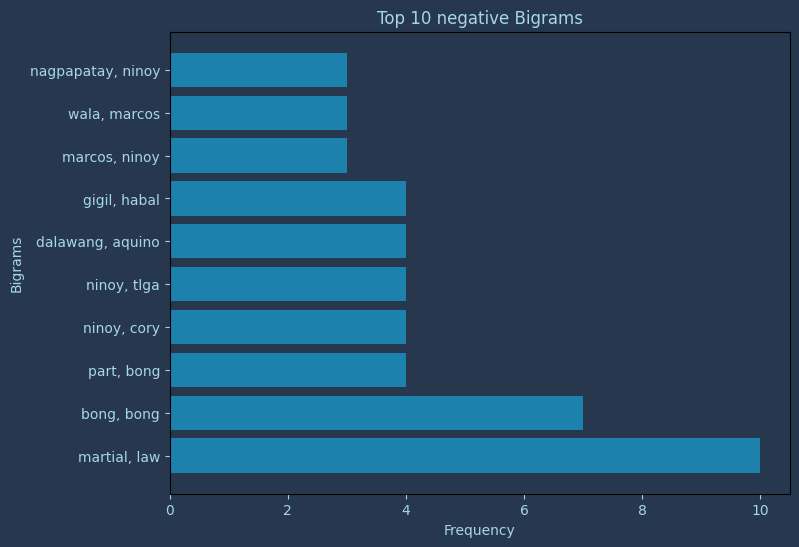

In [43]:
negative.bigrams(10, 'negative', 'negative_context_base_not_bam_related')

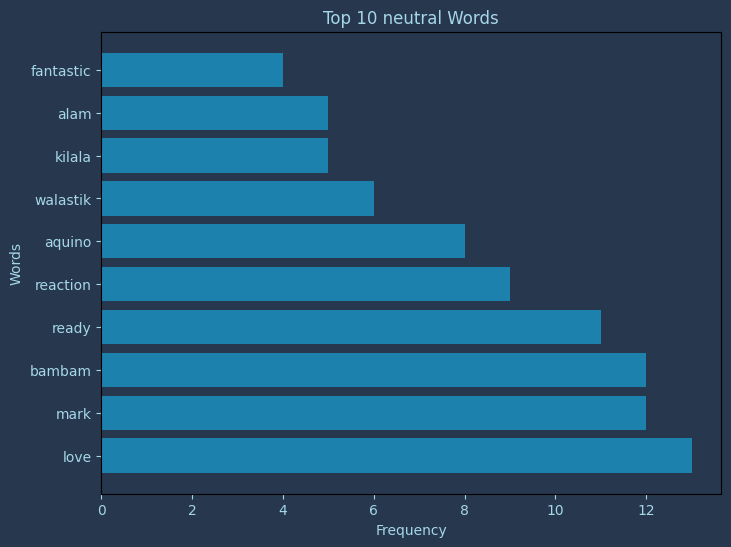

In [44]:
# top 5 neutral comments
z = df2[df2['Comment Validation (Context-based)'] == 1.0]
neutral = eda(z, text_column_name='features_string_format', sent_column_name='Comment Validation (Context-based)')
neutral.top_words(10, 'neutral', 'neutral_context_base_not_bam_related')

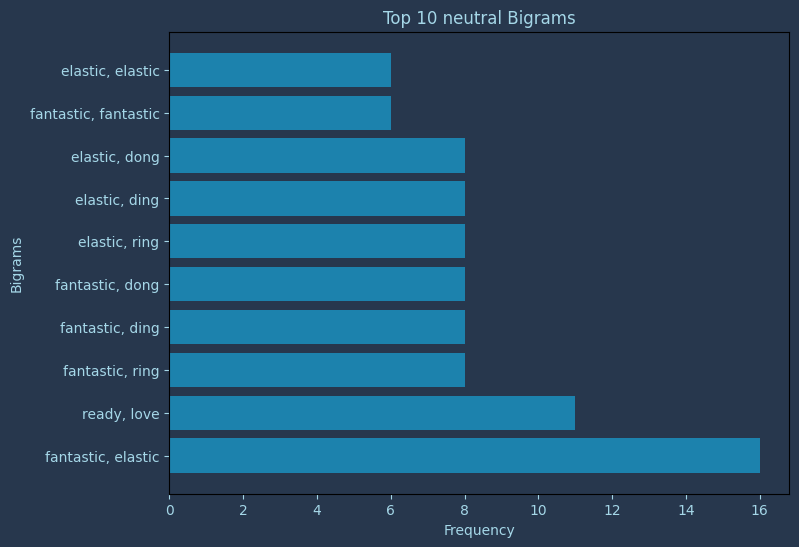

In [45]:
neutral.bigrams(10, 'neutral', 'neutral_context_base_not_bam_related')

# Non Duplicate values (text base)

## Phase 1: comments related to Bam

### A. Facts and analysis

In [46]:
eda_non_duplicates = eda(df1, text_column_name='features_string_format', sent_column_name='Comment type (Text-based)')

In [47]:
df1['Comment type (Text-based)'].value_counts()

1.0    409
0.0    364
2.0    172
Name: Comment type (Text-based), dtype: int64

In [48]:
# total number of comments
eda_non_duplicates.df['features_string_format'].notnull().sum().sum()

945

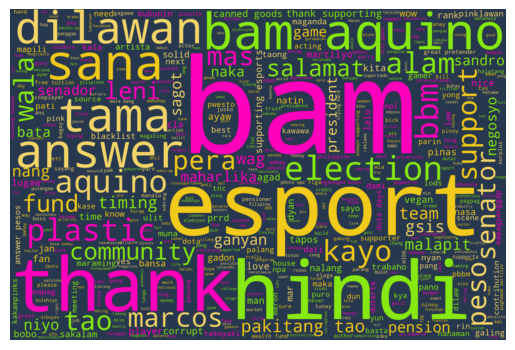

In [49]:
eda_non_duplicates.generate_wordcloud(filename='text_base_bam_related')

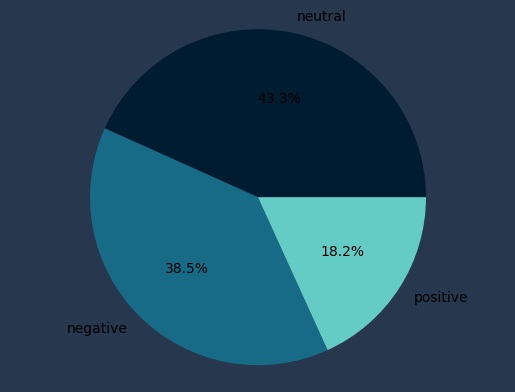

In [50]:
eda_non_duplicates.pie_sentiment('text_base_bam_related', 'Comment type (Text-based)')

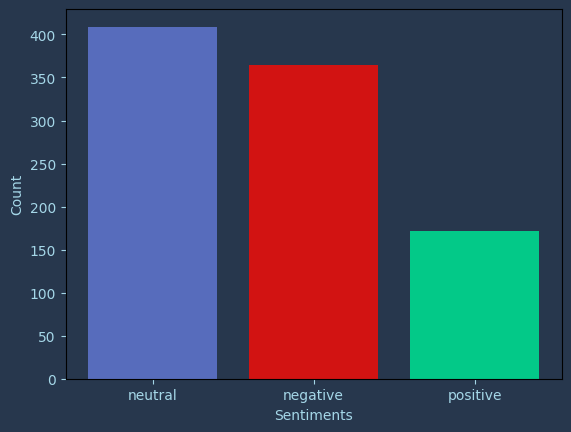

In [51]:
eda_non_duplicates.bar_sentiment('text_base_bam_related', 'Comment type (Text-based)')

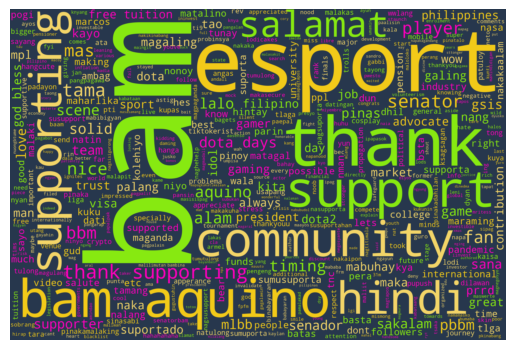

In [52]:
eda_non_duplicates.generate_wordcloud('positive_text_base_bam_related', 'Comment type (Text-based)', 2.0)

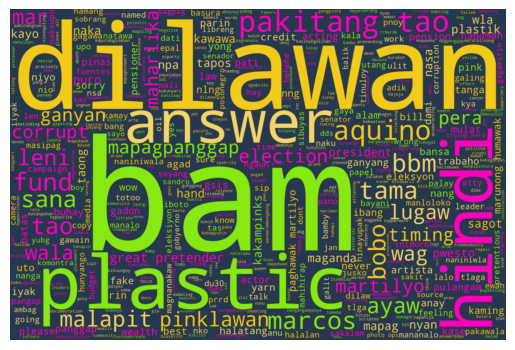

In [53]:
eda_non_duplicates.generate_wordcloud('negative_text_base_bam_related', 'Comment type (Text-based)', 0.0)

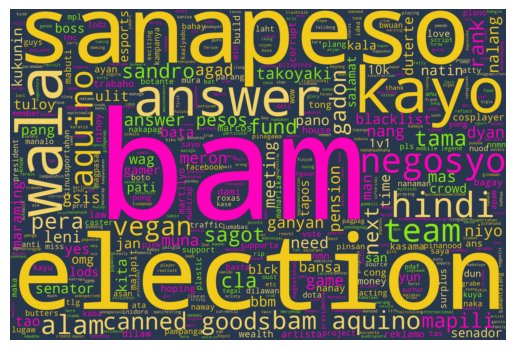

In [54]:
eda_non_duplicates.generate_wordcloud('neutral_text_base_bam_related', 'Comment type (Text-based)', 1.0)

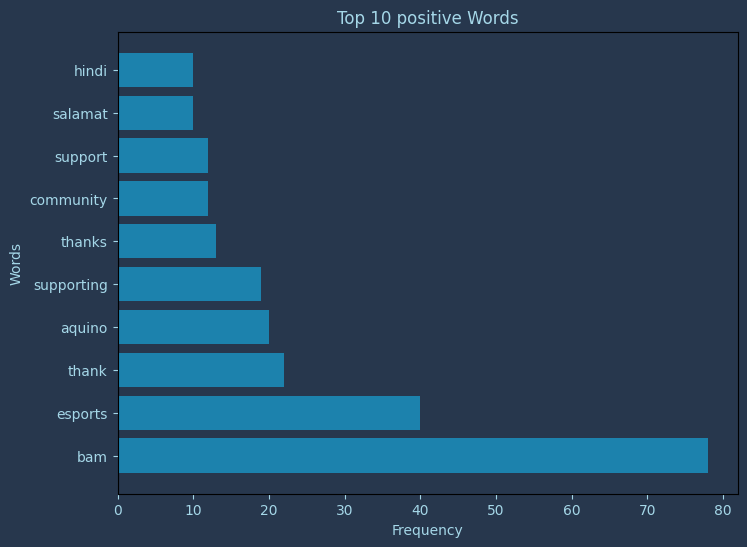

In [55]:
# top 5 positive comments
x = df1[df1['Comment type (Text-based)'] == 2.0]
positive = eda(x, text_column_name='features_string_format', sent_column_name='Comment type (Text-based)')
positive.top_words(10, 'positive', 'positive_text_base_bam_related')

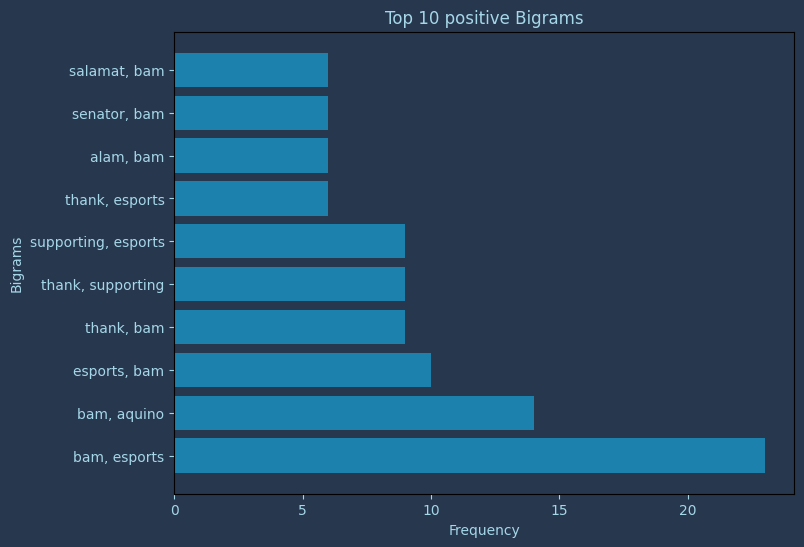

In [56]:
# top 5 positive bigrams
positive.bigrams(10, 'positive', 'positive_text_base_bam_related')

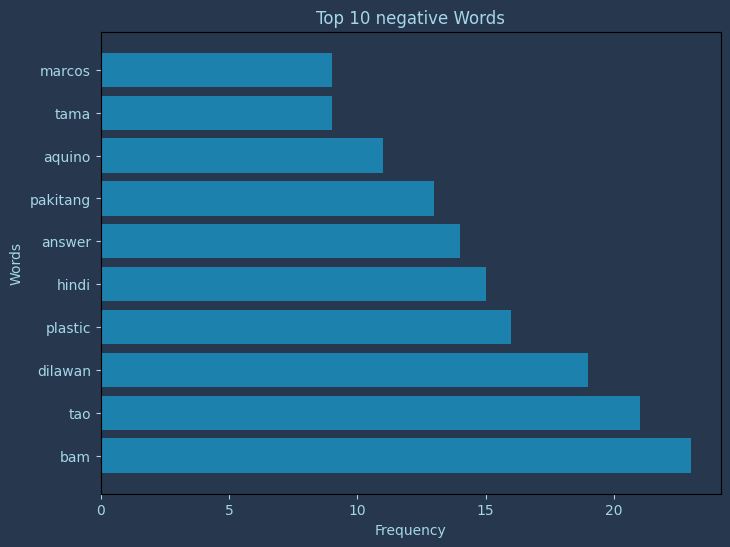

In [57]:
# top 5 negative comments
y = df1[df1['Comment type (Text-based)'] == 0.0]
negative = eda(y, text_column_name='features_string_format', sent_column_name='Comment type (Text-based)')
negative.top_words(10, 'negative', 'negative_text_base_bam_related')

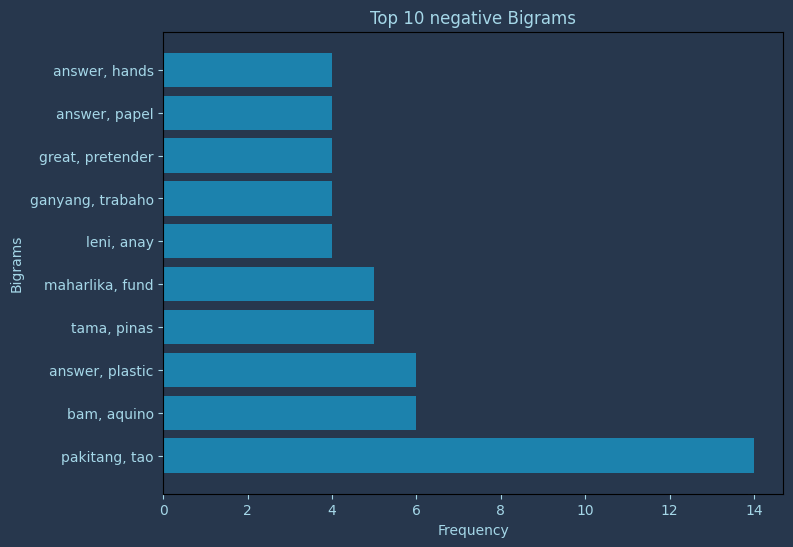

In [58]:
# top 5 negative bigrams
negative.bigrams(10, 'negative', 'negative_text_base_bam_related')

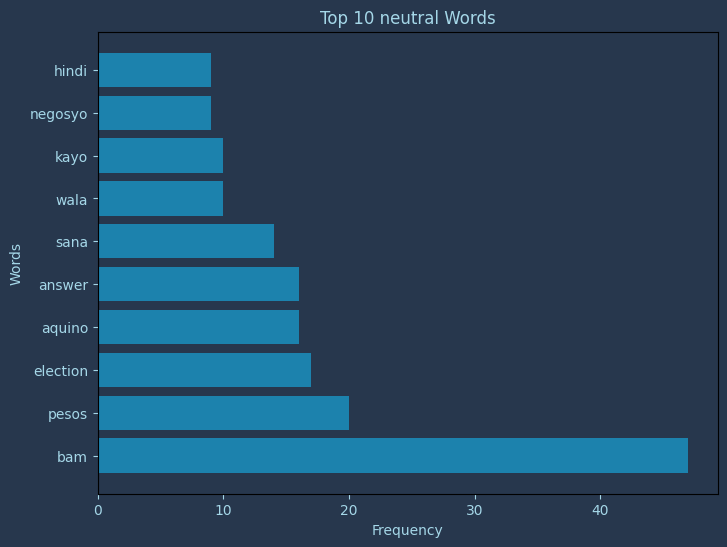

In [59]:
# top 5 neutral comments
z = df1[df1['Comment type (Text-based)'] == 1.0]
neutral = eda(z, text_column_name='features_string_format', sent_column_name='Comment type (Text-based)')
neutral.top_words(10, 'neutral', 'neutral_text_base_bam_related')

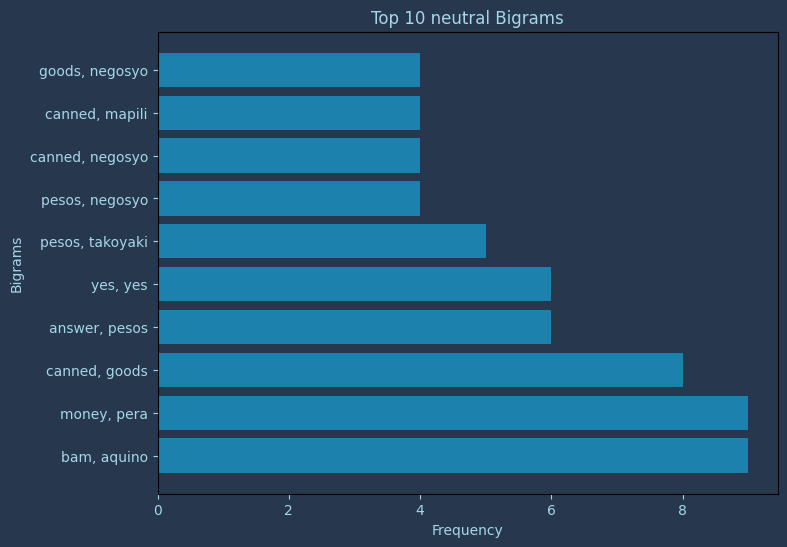

In [60]:
neutral.bigrams(10, 'neutral', 'neutral_text_base_bam_related')

## Phase 2: comments not related to Bam

### A. Facts and analysis

In [61]:
eda_non_duplicates_not_related = eda(df2, text_column_name='features_string_format', sent_column_name='Comment type (Text-based)')

In [62]:
df2['Comment type (Text-based)'].value_counts()

1.0    846
0.0    708
2.0    204
Name: Comment type (Text-based), dtype: int64

In [63]:
# total number of comments
eda_non_duplicates_not_related.df['features_string_format'].notnull().sum().sum()

1758

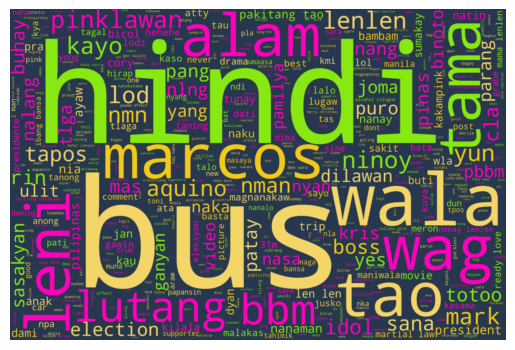

In [64]:
eda_non_duplicates_not_related.generate_wordcloud(filename='text_base_not_bam_related')

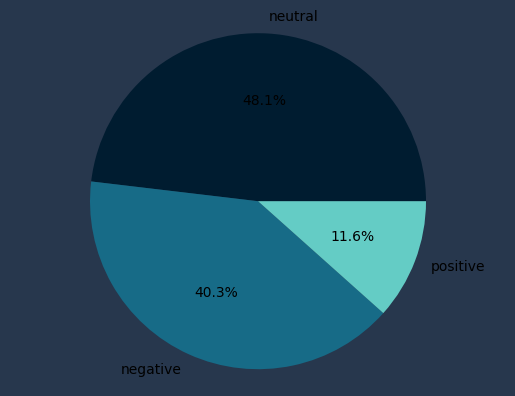

In [65]:
eda_non_duplicates_not_related.pie_sentiment('text_base_not_bam_related', 'Comment type (Text-based)')

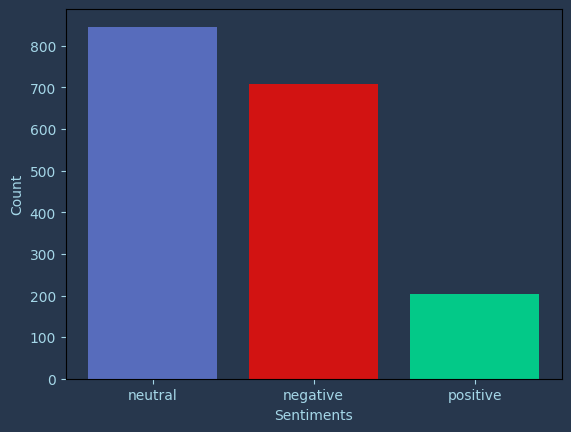

In [66]:
eda_non_duplicates_not_related.bar_sentiment('text_base_not_bam_related', 'Comment type (Text-based)')

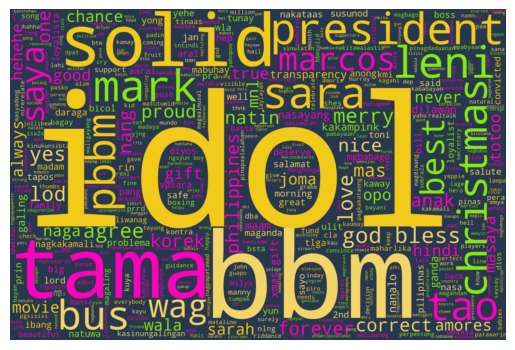

In [67]:
eda_non_duplicates_not_related.generate_wordcloud('positive_text_base_not_bam_related', 'Comment type (Text-based)', 2.0)

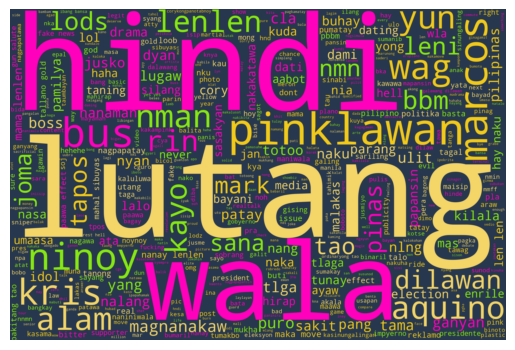

In [68]:
eda_non_duplicates_not_related.generate_wordcloud('negative_text_base_not_bam_related', 'Comment type (Text-based)', 0.0)

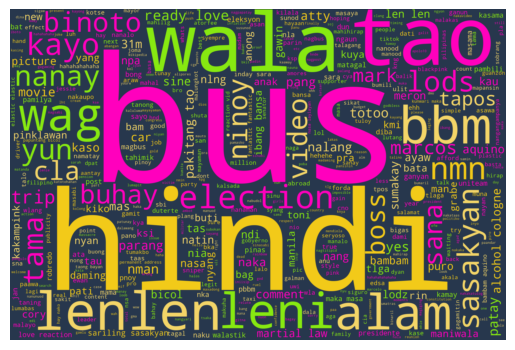

In [69]:
eda_non_duplicates_not_related.generate_wordcloud('neutral_text_base_not_bam_related', 'Comment type (Text-based)', 1.0)

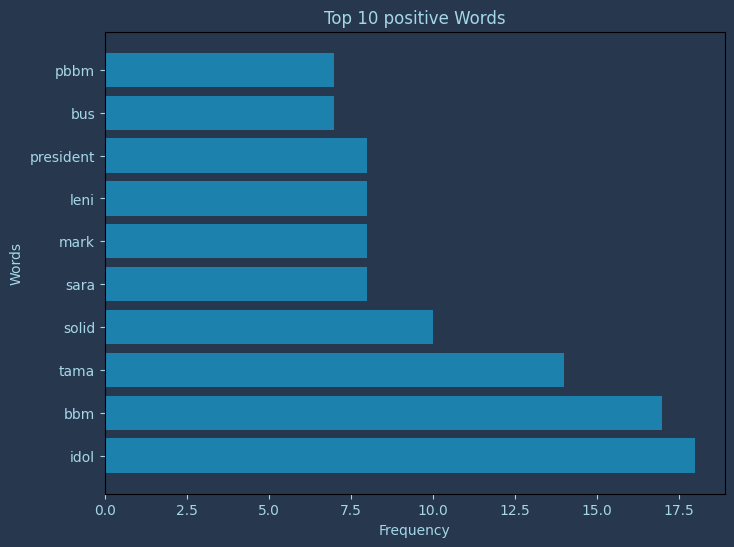

In [70]:
# top 5 positive comments
x = df2[df2['Comment type (Text-based)'] == 2.0]
positive = eda(x, text_column_name='features_string_format', sent_column_name='Comment type (Text-based)')
positive.top_words(10, 'positive', 'positive_text_base_not_bam_related')

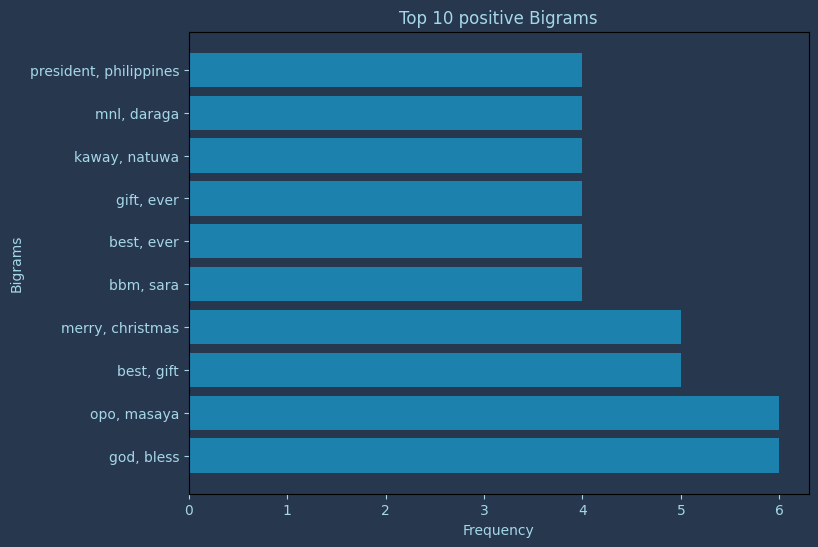

In [71]:
# top 5 positive bigrams
positive.bigrams(10, 'positive', 'positive_text_base_not_bam_related')

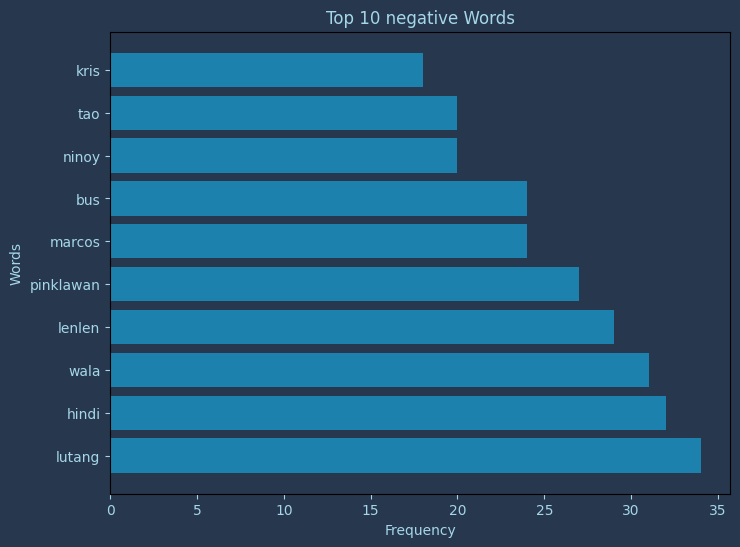

In [72]:
# top 5 negative comments
y = df2[df2['Comment type (Text-based)'] == 0.0]
negative = eda(y, text_column_name='features_string_format', sent_column_name='Comment type (Text-based)')
negative.top_words(10, 'negative', 'negative_text_base_not_bam_related')

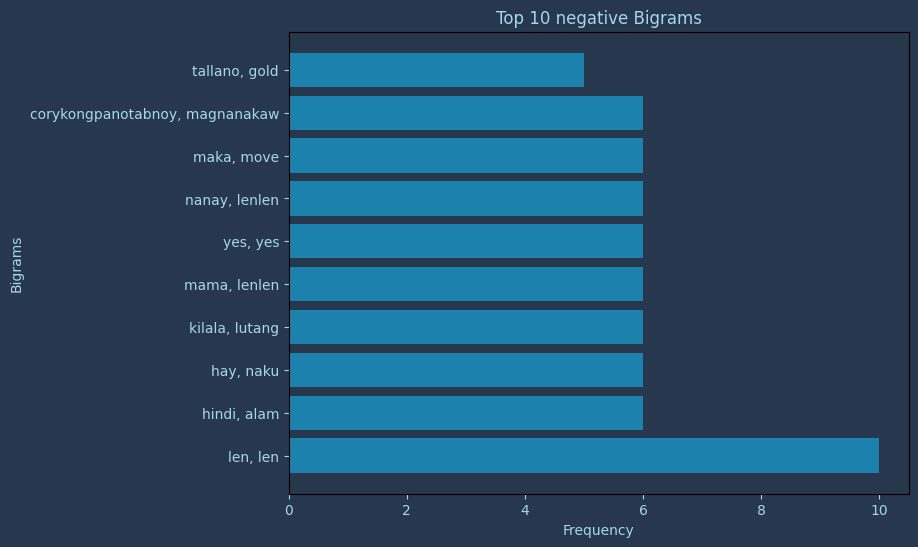

In [73]:
# top 5 negative bigrams
negative.bigrams(10, 'negative', 'negative_text_base_not_bam_related')

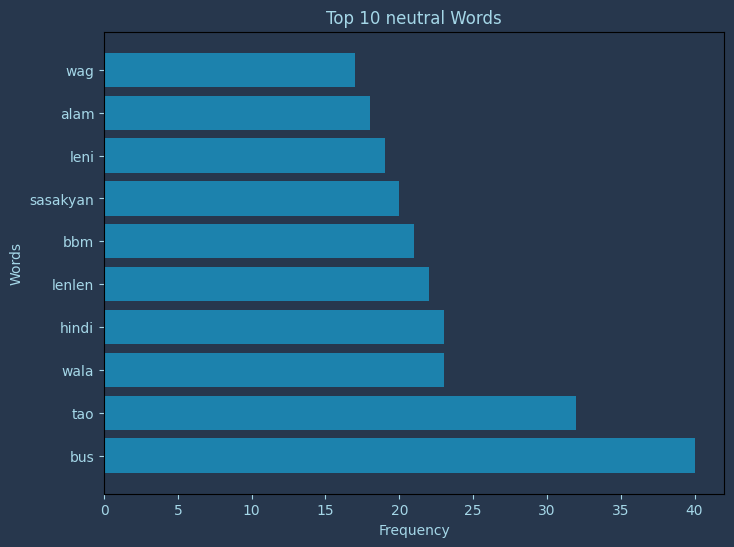

In [74]:
# top 5 neutral comments
z = df2[df2['Comment type (Text-based)'] == 1.0]
neutral = eda(z, text_column_name='features_string_format', sent_column_name='Comment type (Text-based)')
neutral.top_words(10, 'neutral', 'neutral_text_base_not_bam_related')

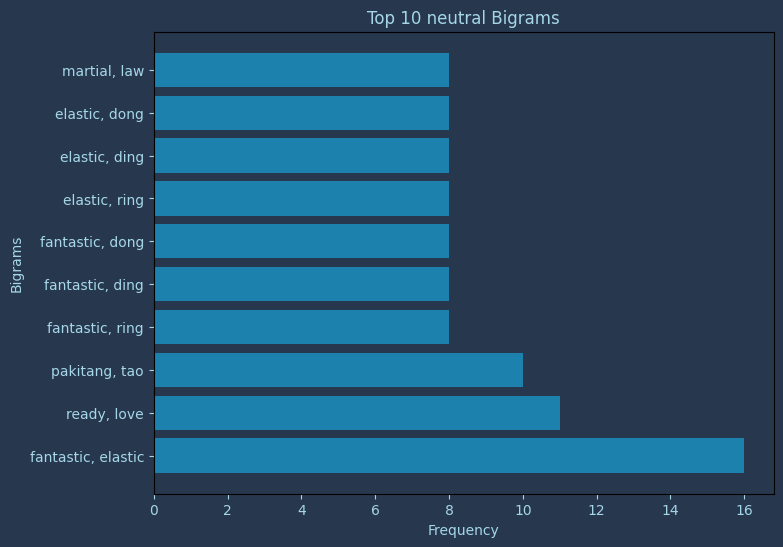

In [75]:
neutral.bigrams(10, 'neutral', 'neutral_text_base_not_bam_related')

# Train the model on the given data

In [76]:
related_context = pd.read_csv('related_context.csv')

In [77]:
related_text = pd.read_csv('related_text.csv')

In [78]:
not_related_context = pd.read_csv('not_related_context.csv')

In [79]:
not_related_text = pd.read_csv('not_related_text.csv')

In [80]:
print(related_context.shape, related_text.shape, not_related_context.shape, not_related_text.shape)

(1500, 10) (1200, 10) (2700, 10) (2400, 10)


In [81]:
# create a model for related to bam and context based
x = models(df=related_context, x='features_string_format', y='Comment Validation (Context-based)', filename='related_context_base')

In [82]:
x.svm()

svm
Accuracy: 0.9066666666666666
F1 score (micro): 0.9066666666666666
F1 score (macro): 0.905921964745494
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       100
           1       0.96      1.00      0.98       100
           2       0.89      0.87      0.88       100

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



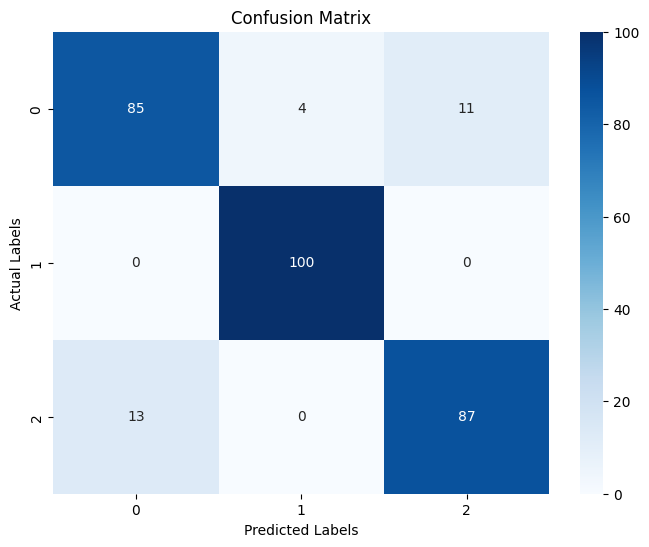

In [83]:
x.evaluate_model()

In [84]:
# create a model for related to bam and text based
y = models(df=related_text, x='features_string_format', y='Comment type (Text-based)', filename='related_text_base')

In [85]:
y.svm()

svm
Accuracy: 0.8125
F1 score (micro): 0.8125
F1 score (macro): 0.8098475584902584
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.65      0.74        80
           1       0.70      0.82      0.76        80
           2       0.91      0.96      0.93        80

    accuracy                           0.81       240
   macro avg       0.82      0.81      0.81       240
weighted avg       0.82      0.81      0.81       240



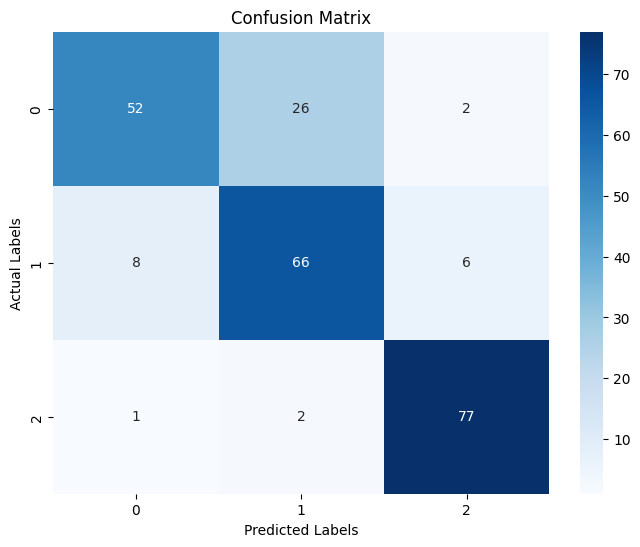

In [86]:
y.evaluate_model()

In [87]:
# create a model for not related to bam and context based
z = models(df=not_related_context, x='features_string_format', y='Comment Validation (Context-based)', filename='not_related_context_base')

In [88]:
z.svm()

svm
Accuracy: 0.8703703703703703
F1 score (micro): 0.8703703703703703
F1 score (macro): 0.8687337691193968
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       180
           1       0.90      0.94      0.92       180
           2       0.87      0.76      0.81       180

    accuracy                           0.87       540
   macro avg       0.87      0.87      0.87       540
weighted avg       0.87      0.87      0.87       540



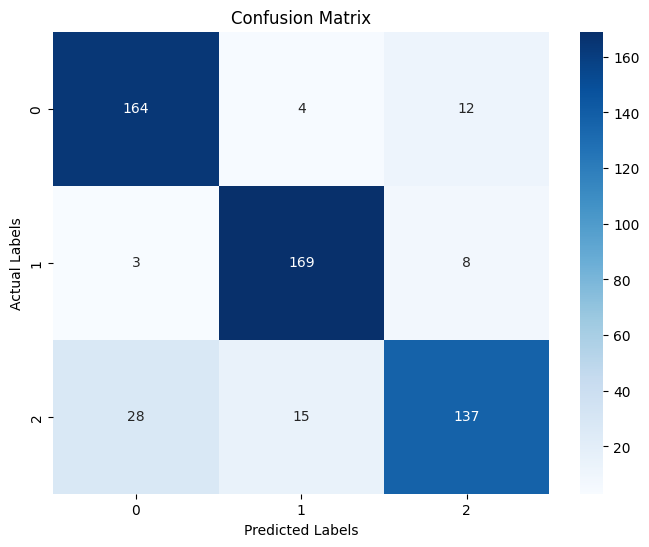

In [89]:
z.evaluate_model()

In [90]:
# create a model for not related to bam and text based
w = models(df=not_related_text, x='features_string_format', y='Comment Validation (Context-based)', filename='not_related_text_base')

In [91]:
w.svm()

svm
Accuracy: 0.8458333333333333
F1 score (micro): 0.8458333333333333
F1 score (macro): 0.6990409306252316
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.60      0.71        84
           1       0.84      0.34      0.48        47
           2       0.84      0.97      0.90       349

    accuracy                           0.85       480
   macro avg       0.85      0.64      0.70       480
weighted avg       0.85      0.85      0.83       480



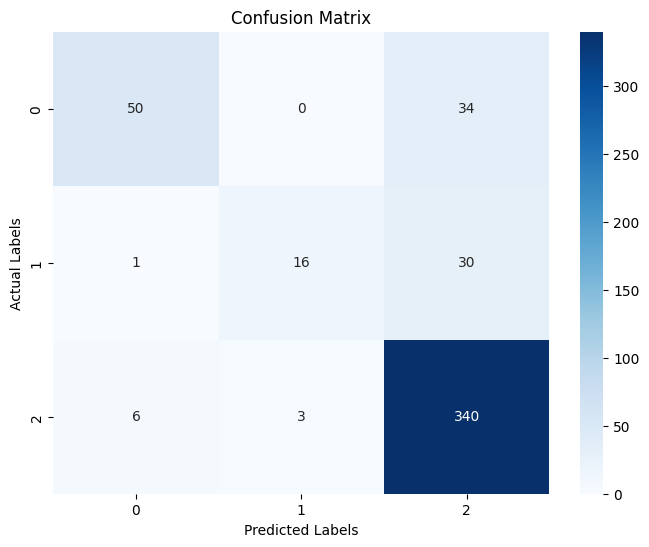

In [92]:
w.evaluate_model()

In [93]:
# end of program

In [57]:
train = pd.read_csv('xtrain.csv')

In [58]:
train = train.iloc[:,1]

In [59]:
vectorizer = TfidfVectorizer()

In [60]:
xtrain_vector = vectorizer.fit_transform(train)

In [63]:
svm_model = joblib.load('related context base/svm_model_related_context_base.pkl')

# Preprocess the input text
text = "bam esports"  # Your input text
df_test = pd.DataFrame({'text': [text]})

# Apply the same vectorizer used in training to transform the test data
xtest_vectors = vectorizer.transform(df_test['text'])

# Make predictions using the SVM model
predictions = svm_model.predict(xtest_vectors)

# Assuming you have a label encoder to decode the predicted labels
# Decode the predicted labels back to their original class labels
label_encoder = LabelEncoder()
label_encoder.fit(x.ytrain)

# Convert predictions to integer type
predictions = predictions.astype(int)

decoded_predictions = label_encoder.inverse_transform(predictions)

# Print the predicted label
print("Predicted Label:", decoded_predictions[0])

Predicted Label: 2.0
